In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load and check dataset

In [2]:
df = pd.read_csv('./house_prices.csv');
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Check some of the fatures' distribution

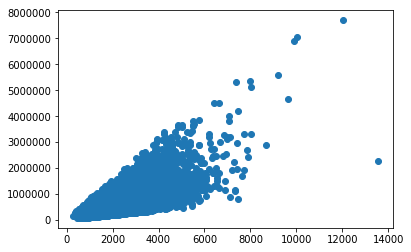

In [4]:
plt.scatter(df['sqft_living'].values, df['price'].values)

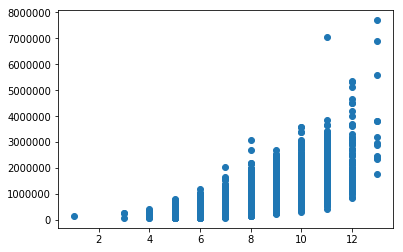

In [5]:
plt.scatter(df['grade'].values, df['price'].values)

## Split the dataset

In [6]:
def split_dataset(df, rate=0.8):
    msk = np.random.rand(len(df)) < rate
    set0 = df[msk]
    set1 = df[~msk]
    return (set0, set1)

train_set, test_set = split_dataset(df)

# Gradient Descent

## use one feature "sqft_living" to predict the house "price"
- choosed hypothesis(linear function): $h_\theta(x) = \theta_0 + (\theta_1*x)$
- choosed cost function(squared error function): $J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$
- need to get the minimized $J(\theta)$ by Gradient Descent

```
the formula is:
repeat until convergence {
```

$$\theta_0:=\theta_0-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})$$

$$\theta_1:=\theta_1-\alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x^{(i)}$$

```
}
```

### Use loop

gradient_descent_loop_with_one_feature initializing with: 
x: [2570  770 1680 ..., 2310 1020 1600]
y: [538000 180000 510000 ..., 400000 402101 400000]
scaled_x: [ 0.03718122 -0.09866784 -0.02998859 ...,  0.01755857 -0.07979992
 -0.03602633]
J(theta): [182123231724.08212, 159165102870.72043, 140472135115.46597, 125235702313.00497, 112800785514.01405] - [33136713813.016651, 33136647390.598759, 33136582171.02578, 33136518132.515602, 33136455253.680183]


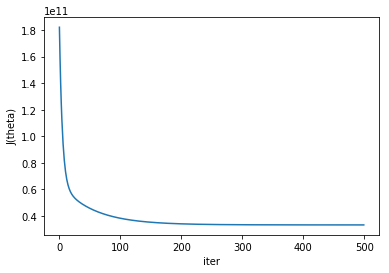

theta0: 539468.8036273032, theta1: 3601313.243695298


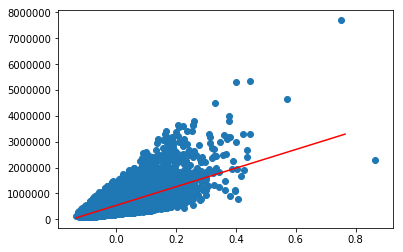

In [7]:
class GradientDescent_Loop_With_OneFeature:
    
    def __init__(self, x, y):
        self.x = self.feature_scaling(x)
        self.y = y
        self.m = len(x)
        print(
            "gradient_descent_loop_with_one_feature initializing with: \nx: {}\ny: {}\nscaled_x: {}".format(x,y,self.x)
        )

    def feature_scaling(self, data):
        return (data - np.average(data)) / (np.max(data) - np.min(data))

    def gradient(self, t0, t1, is1):
        _h = lambda _x: t0 + (t1 * _x)
        result = 0;
        for i in range(self.m):
            if is1:
                result += ((_h(self.x[i]) - self.y[i]) * self.x[i])
            else:
                result += (_h(self.x[i]) - self.y[i])
        return result
    
    def cost_function(self, t0, t1):
        _h = lambda _x: t0 + (t1 * _x)
        _sum = sum([(_h(self.x[i]) - self.y[i]) ** 2 for i in range(self.m)])
        return _sum / (2*self.m)

    def run(self, alpha=0.1, iteration_num=100):
        theta0 = 0
        theta1 = 0
        jtheta = None
        theta0_changes = []
        theta1_changes = []
        jtheta_changes = []

        for i in range(iteration_num):
            temp   = theta0 - (alpha * self.gradient(theta0, theta1, False) / self.m)
            theta1 = theta1 - (alpha * self.gradient(theta0, theta1, True) / self.m)
            theta0 = temp

            theta0_changes.append(theta0)
            theta1_changes.append(theta1)
            jtheta_changes.append(self.cost_function(theta0, theta1))

        print('J(theta): {} - {}'.format(jtheta_changes[:5], jtheta_changes[-5:]))
        
        axe = plt.subplot(111)
        axe.plot(np.arange(0, iteration_num, 1), jtheta_changes)
        axe.set_xlabel('iter')
        axe.set_ylabel('J(theta)')
        plt.show()

        #fig=plt.figure()
        #ax = fig.add_subplot(111, projection='3d')

        #ms = np.linspace(theta0 - 10 , theta0 + 10, iteration_num)
        #bs = np.linspace(theta1 - 50 , theta1 + 50, iteration_num)
        #M, B = np.meshgrid(ms, bs)
        #Z = cost_function(M,B)
        #ax.plot_surface(M,B,Z)

        #X,Y = np.meshgrid(theta0_changes, theta1_changes)
        #Z = cost_function(X,Y)
        #ax.scatter(X,Y,Z,c='red')
        
        print('theta0: {}, theta1: {}'.format(theta0, theta1))
        
        self.show_hypothesis(theta0, theta1)
    
    def show_hypothesis(self, t0, t1):
        axe = plt.subplot(111)    
        axe.scatter(self.x, self.y)

        _h = lambda _a: t0 + (t1 * _a)
        _x = np.arange(np.min(self.x), np.max(self.x), 0.1)
        _y = _h(_x)
        axe.plot(_x, _y, color='red')

GradientDescent_Loop_With_OneFeature(train_set['sqft_living'].values, train_set['price'].values).run(1.9, 500)

### Use Matrix

gradient_descent_loop_with_one_feature initializing with: 
x: [[  1.00000000e+00   2.57000000e+03]
 [  1.00000000e+00   7.70000000e+02]
 [  1.00000000e+00   1.68000000e+03]
 ..., 
 [  1.00000000e+00   2.31000000e+03]
 [  1.00000000e+00   1.02000000e+03]
 [  1.00000000e+00   1.60000000e+03]]
y: [538000 180000 510000 ..., 400000 402101 400000]
m:17258
n: 2
theta: [   1.02924683  262.12837151]
last cost: 33211711934.095795


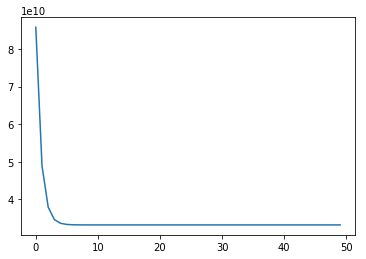

In [8]:
class GradientDescent_Matrix:
    
    def __init__(self, x, y):
        self.m = x.shape[0]
        self.n = x.shape[1]
        self.x = x
        self.y = y
        print(
            "gradient_descent_loop_with_one_feature initializing with: \nx: {}\ny: {}\nm:{}\nn: {}".format(self.x,self.y,self.m,self.n)
        )
    
    def run(self, alpha=0.1, iter_num=100):
        costs = []        
        theta = np.ones(self.n)
        
        for _ in range(iter_num):
            newtheta = np.ones(self.n)
            for j in range(self.n):
                newtheta[j] = theta[j] - (alpha/self.m * np.sum((self.predict(theta) - self.y) * self.x.T[j]))
                
            theta = newtheta
            costs.append(self.cost(theta))
            
        print('theta: {}'.format(theta))
        print('last cost: {}'. format(self.cost(theta)))
                        
        plt.plot(np.arange(iter_num), costs)
        plt.show()
                
    def predict(self, theta, x = None):
        """
        x      is a "m by n matrix"
        theta  is a "n by 1 vector"
        result is a "m by 1 vector"
        """
        x = self.x if x is None else x
        return x.dot(theta)
        
    def cost(self, theta, x = None):
        return np.sum((self.predict(theta, x) - self.y) ** 2) / (2*self.m)
            
_x = train_set['sqft_living'].values
_x = np.array([np.ones(len(_x)), _x]).T
GradientDescent_Matrix(_x, train_set['price'].values).run(0.0000003, 50)

### Use Matrix For Multiple Features

gradient_descent_loop_with_one_feature initializing with: 
x: [[  1.00000000e+00   2.57000000e+03   2.25000000e+00   3.00000000e+00
    7.00000000e+00]
 [  1.00000000e+00   7.70000000e+02   1.00000000e+00   2.00000000e+00
    6.00000000e+00]
 [  1.00000000e+00   1.68000000e+03   2.00000000e+00   3.00000000e+00
    8.00000000e+00]
 ..., 
 [  1.00000000e+00   2.31000000e+03   2.50000000e+00   4.00000000e+00
    8.00000000e+00]
 [  1.00000000e+00   1.02000000e+03   7.50000000e-01   2.00000000e+00
    7.00000000e+00]
 [  1.00000000e+00   1.60000000e+03   2.50000000e+00   3.00000000e+00
    8.00000000e+00]]
y: [538000 180000 510000 ..., 400000 402101 400000]
m:17258
n: 5
theta: [   1.02920662  262.11868152    1.18990777    0.75309594    2.30090411]
last cost: 33211678491.475925


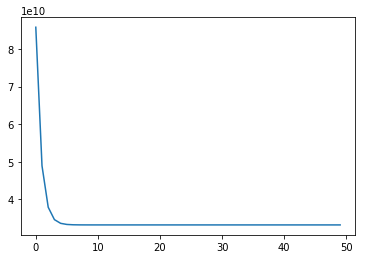

In [9]:
f1 = train_set['sqft_living'].values
f2 = train_set['bathrooms'].values
f3 = train_set['bedrooms'].values
f4 = train_set['grade'].values
_x = np.array([np.ones(len(_x)), f1, f2, f3, f4]).T
GradientDescent_Matrix(_x, train_set['price'].values).run(0.0000003, 50)